## 3. Distribution of the number of transactions per customer in two communities

In [1]:
import pickle
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

with open('data/gameswap_history.pkl', 'rb') as f:
    gameswap = pickle.load(f)
with open('data/gamesale_history.pkl', 'rb') as f:
    gamesale = pickle.load(f)
with open('data/mushroomkingdom_history.pkl', 'rb') as f:
    mushroomkingdom = pickle.load(f)

Though the author column contains **[deleted]**, the user column has the complete history.

In [2]:
if not os.path.exists('data/transaction_history_all.pkl'):
    transaction_history_all = pd.concat([gameswap, gamesale], axis=0)

    # extract the user name from the index column
    # the index column is in the format of 'username_number'
    pattern = r'^(.*)_(?!.*_)'
    # apply the pattern to the column 'index'
    transaction_history_all['user'] = transaction_history_all['index'].apply(lambda x: re.search(pattern, x).group(1))
    # put the user column to the front
    cols = transaction_history_all.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    transaction_history_all = transaction_history_all[cols]

    # Choose the rows where user is not 'none'
    transaction_history_all = transaction_history_all[transaction_history_all['user'] != 'none']

    transaction_history_all.to_pickle('data/transaction_history_all.pkl')
else:
    transaction_history_all = pd.read_pickle('data/transaction_history_all.pkl')

Average number of transactions per user: 

In [3]:
(transaction_history_all.loc[transaction_history_all['subreddit']=='gameswap'].groupby('user').size()).mean()

3.343168856930325

In [4]:
(transaction_history_all.loc[transaction_history_all['subreddit']=='gamesale'].groupby('user').size()).mean()

4.7341577457856525

<Figure size 1200x700 with 0 Axes>

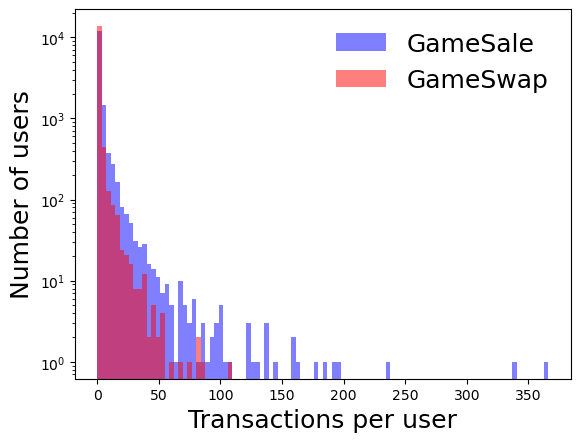

In [5]:
# Group by user and 'subreddit' and count the number of rows.
# Plot the distribution of gameswap and gamesale
# Log scale
plt.figure(figsize=(12,7))
plot_start_year = '2013-01-01'
plot_end_year = '2021-12-31'
game_two_sub = transaction_history_all.loc[(transaction_history_all['created_utc']<=plot_end_year)&
                             (transaction_history_all['created_utc']>=plot_start_year)].groupby(['user', 'subreddit']).count()['index'].unstack().fillna(0)
game_two_sub.plot(kind='hist', bins=100, logy=True, alpha=0.5,color=['b','red'])
plt.xlabel('Transactions per user', fontsize=18)
plt.ylabel('Number of users', fontsize=18)
# plt.title('Distribution of number of transactions per user')
plt.legend(['GameSale', 'GameSwap'], frameon=False, fontsize=18)
plt.savefig('./plot/transaction_distribution.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

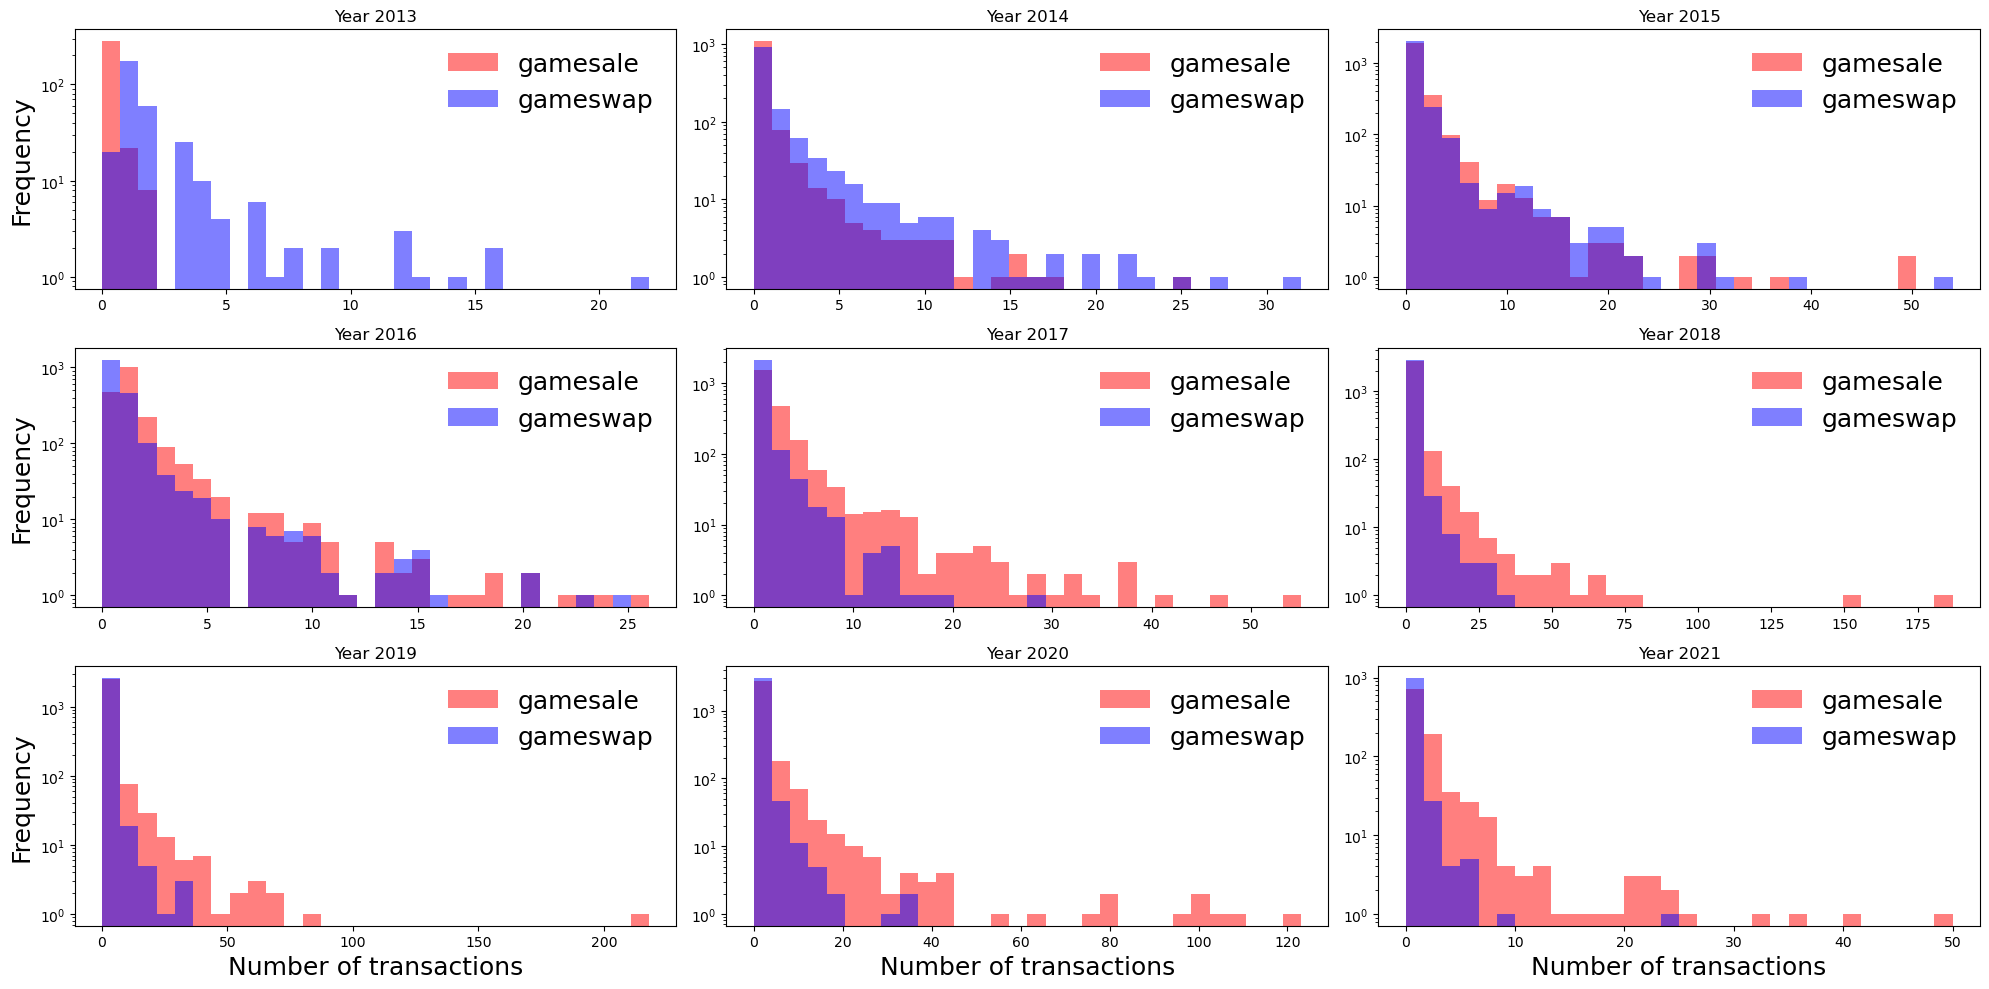

In [12]:
# Create subdataframe for each year using the 'created_utc' column from year 2013 to 2020
game_2013 = transaction_history_all.loc[transaction_history_all['created_utc']<="2013-12-31"]
game_2014 = transaction_history_all.loc[(transaction_history_all['created_utc']>="2014-01-01") & (transaction_history_all['created_utc']<="2014-12-31")]
game_2015 = transaction_history_all.loc[(transaction_history_all['created_utc']>="2015-01-01") & (transaction_history_all['created_utc']<="2015-12-31")]
game_2016 = transaction_history_all.loc[(transaction_history_all['created_utc']>="2016-01-01") & (transaction_history_all['created_utc']<="2016-12-31")]
game_2017 = transaction_history_all.loc[(transaction_history_all['created_utc']>="2017-01-01") & (transaction_history_all['created_utc']<="2017-12-31")]
game_2018 = transaction_history_all.loc[(transaction_history_all['created_utc']>="2018-01-01") & (transaction_history_all['created_utc']<="2018-12-31")]
game_2019 = transaction_history_all.loc[(transaction_history_all['created_utc']>="2019-01-01") & (transaction_history_all['created_utc']<="2019-12-31")]
game_2020 = transaction_history_all.loc[(transaction_history_all['created_utc']>="2020-01-01") & (transaction_history_all['created_utc']<="2020-12-31")]
game_2021 = transaction_history_all.loc[(transaction_history_all['created_utc']>="2021-01-01") & (transaction_history_all['created_utc']<="2021-03-31")]
game_years = [game_2013, game_2014, game_2015, game_2016, game_2017, game_2018, game_2019, game_2020, game_2021]

# Plot these subdataframes, group by user and 'subreddit' and count the number of rows.
# In a plot, plot these subdataframes in a line plot
# Plot the distribution of gameswap and gamesale in each year
plt.clf()
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for year, game_year in enumerate(game_years):
    to_plot = game_year.groupby(['user', 'subreddit']).size().unstack().fillna(0)
    # Plot the distribution of gameswap and set alpha to 0.5 ,plot the distribution of gamesale and set alpha to 1 in the same plot.
    to_plot.plot(kind='hist', alpha=0.5, ax=ax[year//3, year%3],logy=True, color=['r','blue'],bins=30)
   # legend
    ax[year//3, year%3].legend(frameon=False, fontsize=18)
    # title
    ax[year//3, year%3].set_title('Year {}'.format(2013+year))
    # x label
    if year>=6:
        ax[year//3, year%3].set_xlabel('Number of transactions', fontsize=18)
    # ax[year//3, year%3].set_xlabel('Number of transactions')
    if year in([0,3,6]):
        ax[year//3, year%3].set_ylabel('Frequency', fontsize=18)
    else:
        ax[year//3, year%3].set_ylabel('')
plt.tight_layout()
plt.savefig('./plot/transaction_distribution_year.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

